# **Proyecto**

## *Detección y clasificación de Queratocono*

#### Zahid Medrano Flores  <p align="right">zahidmedrano@ciencias.unam.mx &emsp;</p>

## **Introducción**

El queratocono es una enfermedad ocular progresiva que afecta la córnea, una superficie transparente en la parte frontal del ojo. En condiciones normales, la córnea tiene una forma redondeada y superficie regular que permite que la luz se enfoque correctamente en la parte trasera del ojo. Sin embargo, en el queratocono, la córnea se debilita y adelgaza de manera gradual, haciendo que se abulte hacia afuera en forma de un cono (de ahí el nombre). Esta deformación irregular distorsiona la forma en que la luz entra en el ojo, provocando principalmente  visión borrosa.

Generalmente, el queratocono comienza a manifestarse en la adolescencia o principios de los veinte años y puede progresar a diferentes ritmos en cada individuo. A medida que la enfermedad avanza, la visión puede empeorar significativamente y no corregirse completamente con lentes correctivas convencionales.

La detección temprana del queratocono es crucial para para impedir su progresión. Existen varios métodos comunes utilizados para diagnosticar esta afección, en este proyecto nos enfocamos principalmente en las topografías cornéales. La *topografía corneal* crea un mapa de la superficie anterior de la córnea, mostrando irregularidades y elevaciones.

## **Problema**

El problema principal en nuestro pais radica principalmente en esta etapa de detección. En muchas instancias las personas ignoran los problemas que se tienen, pero muchas otras veces, es la dificultad de obtener respuestas claras por la falta de personas capacitadas y lugares especializados que sean capaces de darnos un diagnóstico claro. Lo ideal sería que muchas personas mas tengan acceso a los estudios necesarios y por otro lado, simplificar el proceso para ayudar a las mismas personas capacitadas.

## **¿Cómo se hará?**

El próposito principal de este proyecto se enfoca en poder realizar un primer diagnóstico, para saber si una persona tiene o no el padecimiento. En teoría tambien podría darnos una etapa del mismo, pero tenemos menos datos para la parte del queratocono mas avanzado.

A partir de un dataset, con alrededor de 3200 filas y 450 columnas, se realizó un preprocesamiento y se hicieron pruebas de distintos modelos predictivos, con los cuales se busca encontrar las varias etapas de queratocono que una persona pueda presentar.

<center> Para mayores detalles véase el Reporte Final. </center>

### **Análisis Exploratorio**

Primero se cargan las librerias que utilizaremos a lo largo del trabajo. Y simplemente comenzamos cargando los datos.

In [1]:
# librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, mutual_info_classif

In [2]:
# carga de datos para la parte exploratoria
data = pd.read_csv(r"Datos/dataset.csv")

Información general del dataframe

In [7]:
# dimensiones
print(f"\nFilas: {data.shape[0]}, Columnas: {data.shape[1]}")

# información general
data.info()


Filas: 3162, Columnas: 448
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 448 entries, Unnamed: 0 to ESI.Posterior.
dtypes: float64(319), int64(127), object(2)
memory usage: 10.8+ MB


In [8]:
# primeras filas del dataset
data.head(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
0,9,1OS(Left),44.53,21,39.22,111,41.87,5.32,86.7,0.91,...,3.131,97,-0.722,3.350,1.053,3.512,99,Enable,45,27
1,10,1OD(Right),43.84,39,42.46,129,43.15,1.38,88.2,0.65,...,0.575,97,0.085,0.921,0.290,0.966,100,Enable,0,0
2,39,2OD(Right),44.81,66,44.41,156,44.61,0.40,83.0,0.48,...,0.177,9,0.268,0.263,0.640,0.692,100,Enable,0,0
3,55,4OS(Left),44.00,51,42.31,141,43.15,1.69,97.3,0.60,...,0.492,275,-0.281,3.396,1.419,3.680,100,Enable,0,29
4,56,4OD(Right),45.42,26,45.20,116,45.31,0.22,93.3,0.69,...,0.571,85,0.109,0.691,0.181,0.714,100,Enable,0,7
5,68,5OS(Left),62.98,68,42.51,158,52.74,20.47,95.5,0.25,...,3.791,45,-1.581,13.387,9.154,16.218,98,Enable,95,0
6,69,5OD(Right),44.23,85,42.86,175,43.54,1.37,96.7,0.43,...,0.269,88,0.105,0.398,0.376,0.548,100,Enable,0,0
7,87,6OD(Right),44.61,170,43.75,80,44.18,0.86,97.9,0.46,...,0.085,20,0.375,0.437,0.360,0.566,100,Enable,0,52
8,88,6OS(Left),44.13,174,43.03,84,43.58,1.10,97.2,0.46,...,0.146,229,0.353,0.371,0.485,0.611,100,Enable,0,63
9,138,8OD(Right),45.83,165,45.37,75,45.60,0.46,96.8,0.80,...,0.219,74,0.269,0.330,0.315,0.457,100,Enable,0,24


In [9]:
# últimas filas del dataset
data.tail(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
3152,12232,1809OS(Left),44.32,67,43.52,157,43.92,0.79,95.5,0.63,...,0.125,103,0.280,0.587,0.440,0.734,100,Enable,0,0
3153,12233,1810OS(Left),47.26,57,46.79,147,47.02,0.47,95.6,0.60,...,0.549,140,0.240,0.689,0.305,0.753,100,Enable,0,0
3154,12234,1810OD(Right),48.94,123,47.23,33,48.09,1.70,95.2,0.68,...,0.417,100,0.440,0.593,0.578,0.828,100,Enable,0,6
3155,12236,1811OS(Left),45.15,82,44.27,172,44.71,0.88,97.0,0.69,...,0.237,227,0.161,0.327,0.258,0.416,100,Enable,0,0
3156,12237,1812OS(Left),46.22,119,44.34,29,45.28,1.88,92.2,0.42,...,0.865,266,0.608,0.921,0.630,1.116,100,Enable,12,7
3157,12238,1812OD(Right),46.60,86,45.79,176,46.19,0.81,97.0,0.75,...,0.384,339,0.164,0.583,0.259,0.638,100,Enable,0,10
3158,12239,1813OS(Left),44.05,82,43.90,172,43.97,0.15,96.4,0.63,...,0.156,217,0.242,0.388,0.387,0.548,100,Enable,0,5
3159,12240,1813OD(Right),44.12,3,43.47,93,43.80,0.66,96.6,0.60,...,0.179,337,0.348,0.313,0.384,0.495,100,Enable,0,0
3160,12241,1814OS(Left),46.59,90,44.74,0,45.66,1.86,96.1,0.74,...,0.609,113,-0.124,1.092,0.842,1.379,100,Enable,0,0
3161,12242,1814OD(Right),46.49,79,45.38,169,45.93,1.11,96.5,0.73,...,0.280,56,0.001,0.726,0.348,0.805,100,Enable,0,0


In [10]:
# descripición básica
data.describe()

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,HOAs.S3456..4,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,...,3162.00000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,7455.013599,45.389712,90.914611,43.843495,85.449715,44.616521,1.546275,95.610626,0.523526,44.571834,...,0.64360,0.629779,170.340923,0.185911,1.067495,0.749348,1.330833,99.921252,5.567995,8.851044
std,3346.302814,3.471090,53.893491,2.787700,55.135984,3.001295,1.899108,3.711964,0.325721,2.946320,...,1.26221,1.118622,101.159626,0.589008,1.800681,1.187925,2.140924,0.696489,18.705326,19.258172
min,9.000000,33.450000,0.000000,26.400000,0.000000,29.930000,0.020000,47.400000,-0.930000,30.460000,...,0.13000,0.003000,0.000000,-10.508000,0.088000,0.135000,0.221000,79.000000,0.000000,0.000000
25%,4829.250000,43.842500,49.000000,42.580000,34.000000,43.260000,0.570000,95.000000,0.480000,43.250000,...,0.25825,0.206250,87.000000,0.117000,0.412000,0.342000,0.568000,100.000000,0.000000,0.000000
50%,7762.500000,44.970000,92.000000,43.790000,87.000000,44.370000,1.000000,96.900000,0.590000,44.350000,...,0.33100,0.332000,151.000000,0.235000,0.564500,0.434000,0.717000,100.000000,0.000000,0.000000
75%,10439.750000,46.140000,133.000000,44.900000,127.000000,45.520000,1.720000,97.700000,0.680000,45.510000,...,0.48900,0.575000,264.000000,0.346000,0.880750,0.630000,1.067750,100.000000,0.000000,7.000000
max,12242.000000,83.750000,180.000000,77.160000,179.000000,80.450000,20.470000,98.500000,1.610000,80.890000,...,22.94400,15.967000,359.000000,3.659000,30.185000,20.254000,33.921000,100.000000,95.000000,95.000000


In [11]:
sel_cols = [column for column, is_type in (data.dtypes=="object").items() if is_type]   #estas son las columnas que son objetos
sel_cols

['idEye', 'En.Anterior.']

In [12]:
data['idEye'].value_counts()

idEye
1814OD(Right)    1
1OS(Left)        1
1OD(Right)       1
2OD(Right)       1
4OS(Left)        1
                ..
10OS(Left)       1
10OD(Right)      1
9OD(Right)       1
9OS(Left)        1
8OS(Left)        1
Name: count, Length: 3162, dtype: int64

In [13]:
data['En.Anterior.'].value_counts()

En.Anterior.
Enable    3162
Name: count, dtype: int64

In [14]:
# porcentaje de valores faltantes por columna
null = data.isnull().mean() * 100
null = null[null > 0].sort_values(ascending=False)

null     # no hay datos nulos

Series([], dtype: float64)

In [17]:
# seleccionamos un subconjunto de variables numéricas para la matriz de correlación
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
selected_cols = ['Ks', 'Kf', 'AvgK', 'CYL', 'Ks.Axis', 'Kf.Axis', 'ACCP', 'Thinnest', 'Asymmetry', 'Regular']

# filtrar columnas
selected_cols = [col for col in selected_cols if col in numeric_cols]

# matriz de correlación
corr_matrix = data[selected_cols].corr()

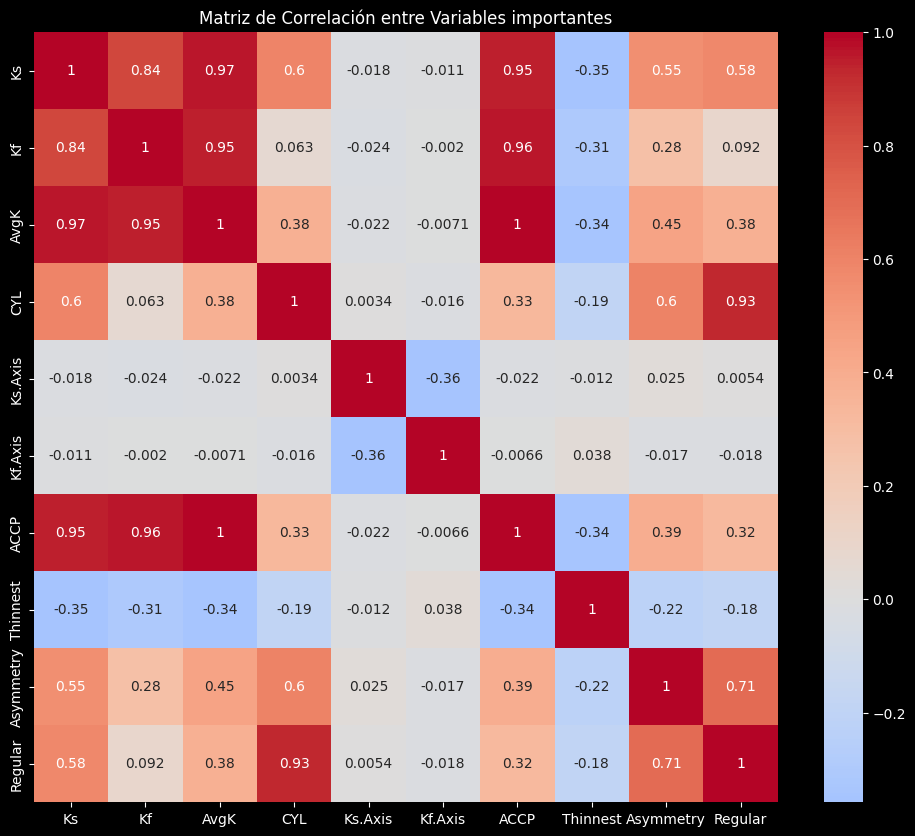

In [18]:
# visualización
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables importantes')
plt.show()

In [19]:
print("\nCorrelaciones (|r| > 0.7):")
corrs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
corrs = corrs[abs(corrs) > 0.7]
corrs = corrs[corrs.index.get_level_values(0) != corrs.index.get_level_values(1)]
corrs.head(10)


Correlaciones (|r| > 0.7):


AvgK  ACCP    0.996519
ACCP  AvgK    0.996519
Ks    AvgK    0.967318
AvgK  Ks      0.967318
ACCP  Kf      0.960414
Kf    ACCP    0.960414
Ks    ACCP    0.952004
ACCP  Ks      0.952004
AvgK  Kf      0.948840
Kf    AvgK    0.948840
dtype: float64

La selección de estas variables tiene que ver con su importancia en la queratometría y su alta correlación que presentan, tenemos por ejemplo las curvaturas cornéales y su average o el cilindro del ojo.

In [56]:
main_variables = ['Ks', 'Kf', 'AvgK', 'CYL', 'Ks.Axis', 'Kf.Axis', 'ACCP', 'Ks.1', 'Kf.1', 'AvgK.1', 'CYL.1']

# Estadísticas descriptivas para estas variables principales
data[main_variables].describe()

,Ks,Kf,AvgK,CYL,Ks.Axis,Kf.Axis,ACCP,Ks.1,Kf.1,AvgK.1,CYL.1
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,45.389712,43.843495,44.616521,1.546275,90.914611,85.449715,44.571834,50.567581,48.844807,49.706123,1.722663
std,3.471090,2.787700,3.001295,1.899108,53.893491,55.135984,2.946320,3.867005,3.105564,3.343780,2.115801
min,33.450000,26.400000,29.930000,0.020000,0.000000,0.000000,30.460000,37.270000,29.410000,33.340000,0.030000
25%,43.842500,42.580000,43.260000,0.570000,49.000000,34.000000,43.250000,48.850000,47.440000,48.190000,0.640000
50%,44.970000,43.790000,44.370000,1.000000,92.000000,87.000000,44.350000,50.100000,48.785000,49.430000,1.115000
75%,46.140000,44.900000,45.520000,1.720000,133.000000,127.000000,45.510000,51.407500,50.027500,50.710000,1.920000
max,83.750000,77.160000,80.450000,20.470000,180.000000,179.000000,80.890000,93.300000,85.960000,89.630000,22.810000


Nuevamente, estas variables son aquellas con alta correlación y que tienen mucho que ver en el estudio de la córnea. Tenemos que la curvatura es probablemente la medida más importante que se tiene para poder detectar el queratocono.

In [57]:
# outliers
def outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

for col in main_variables[:4]:
    outliers = outlier(data[col])
    print(f"\nOutliers en {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.describe())


Outliers en Ks: 158
count    158.000000
mean      54.456709
std       10.229049
min       33.450000
25%       50.037500
50%       52.250000
75%       60.092500
max       83.750000
Name: Ks, dtype: float64

Outliers en Kf: 121
count    121.000000
mean      47.062479
std       11.244682
min       26.400000
25%       37.730000
50%       48.780000
75%       54.780000
max       77.160000
Name: Kf, dtype: float64

Outliers en AvgK: 115
count    115.000000
mean      52.241217
std       10.994693
min       29.930000
25%       39.810000
50%       52.030000
75%       58.165000
max       80.450000
Name: AvgK, dtype: float64

Outliers en CYL: 272
count    272.000000
mean       6.441875
std        3.194376
min        3.460000
25%        4.147500
50%        5.265000
75%        7.490000
max       20.470000
Name: CYL, dtype: float64


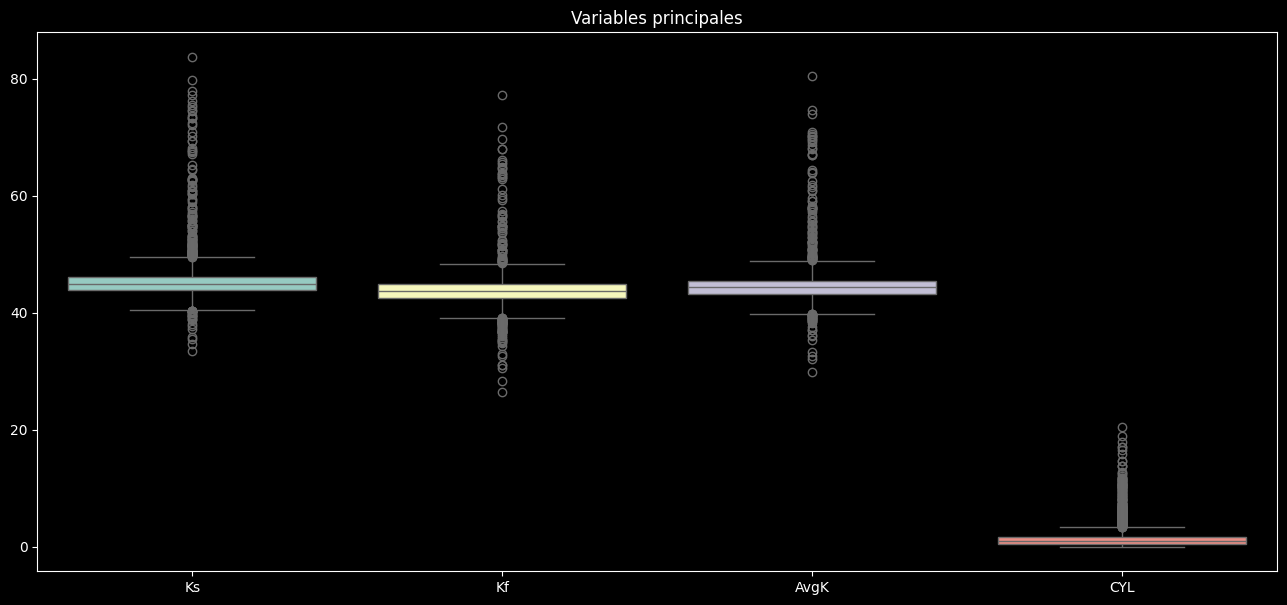

In [58]:
# outliers
plt.figure(figsize=(16, 7))
sns.boxplot(data=data[main_variables[:4]])
plt.title('Variables principales')
plt.grid(False)
plt.xticks()
plt.show()

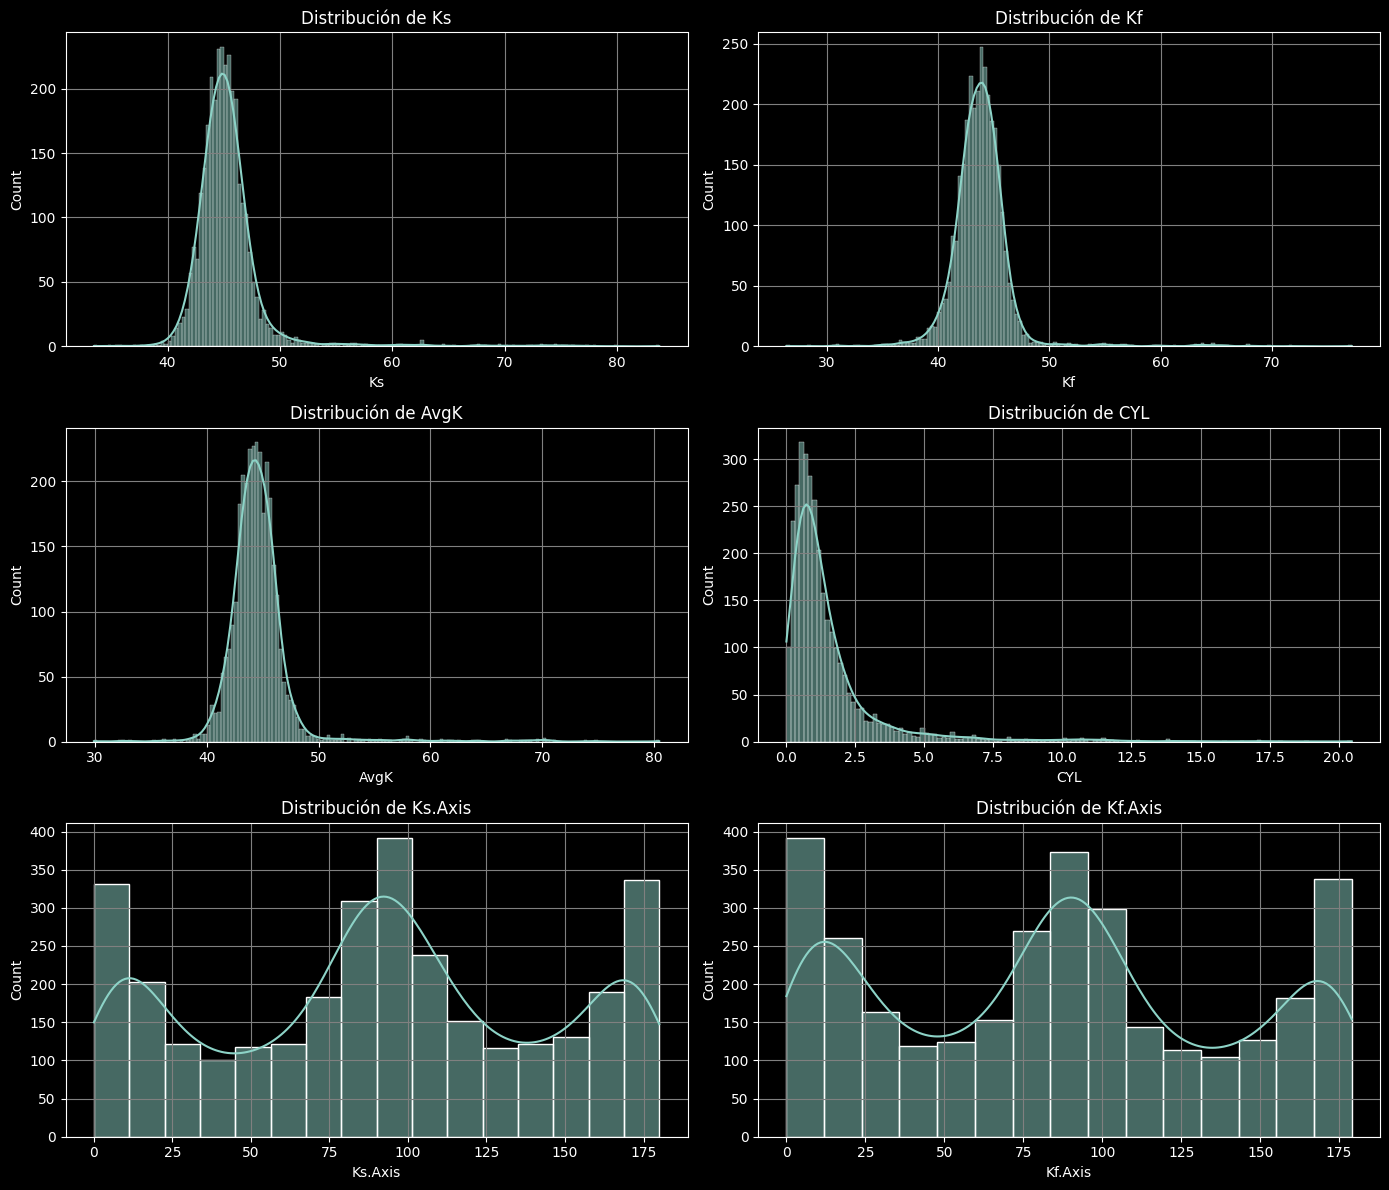

In [59]:
# distribución de las variables principales
plt.figure(figsize=(14, 12))
for i, col in enumerate(main_variables[:6], 1):
    plt.subplot(3, 2, i)
    plt.grid(color='#808080')
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

In [40]:
# función para saber el lado del ojo
def eye_side(s):
    if 'Left' in s:
        return 'Left'
    elif 'Right' in s:
        return 'Right'
    else:
        return 'Unknown'

data['EyeSide'] = data['idEye'].apply(eye_side)

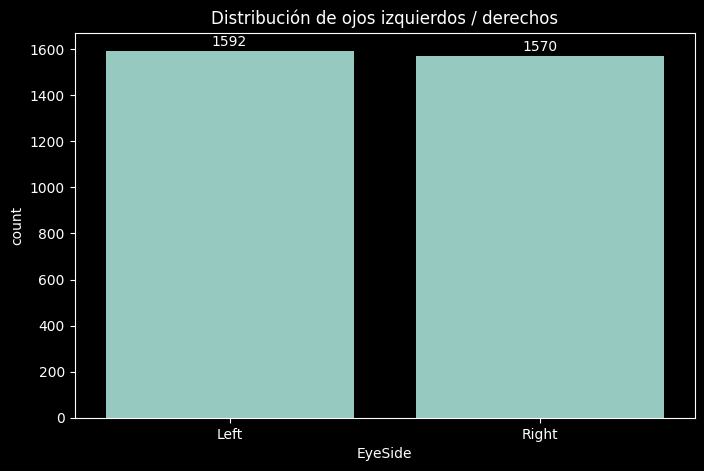

In [41]:
# visualización
plt.figure(figsize=(8, 5))
plt.grid(False)
ax = sns.countplot(data=data, x='EyeSide')
plt.title('Distribución de ojos izquierdos / derechos')

# conteo de cada columna
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.,
            height + 10,
            f'{int(height)}',
            ha='center',
            va='bottom')

plt.show()


Comparación de métricas por lado del ojo:
                Ks         Kf       AvgK       CYL         AA    Thinnest
EyeSide                                                                  
Left     45.398549  43.856344  44.627337  1.542293  95.686244  530.440327
Right    45.380752  43.830465  44.605554  1.550312  95.533949  527.835669


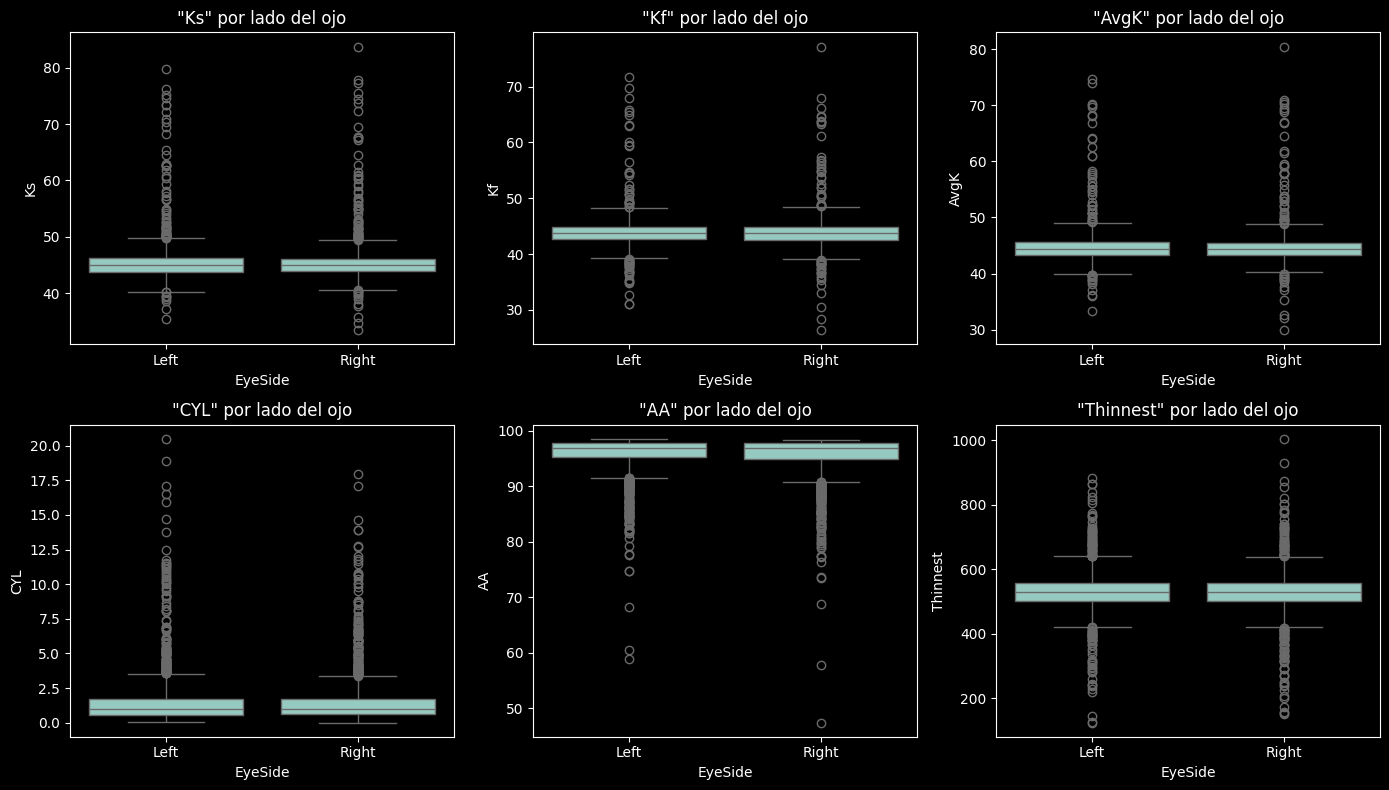

In [42]:
# comparación de algunas varialbes importantes por lado del ojo
if 'EyeSide' in data.columns:
    comparison_cols = ['Ks', 'Kf', 'AvgK', 'CYL', 'AA', 'Thinnest']
    comparison_cols = [col for col in comparison_cols if col in data.columns]
    
    print("\nComparación de métricas por lado del ojo:")
    print(data.groupby('EyeSide')[comparison_cols].mean())
    
    # plot
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(comparison_cols, 1):
        plt.subplot(2, 3, i)
        plt.grid(False)
        sns.boxplot(data=data, x='EyeSide', y=col)
        plt.title(f'"{col}" por lado del ojo')
    plt.tight_layout()
    plt.show()

Los datos no varian por el lado del ojo, entonces esto es algo irrelevante, pero interesante de observar.

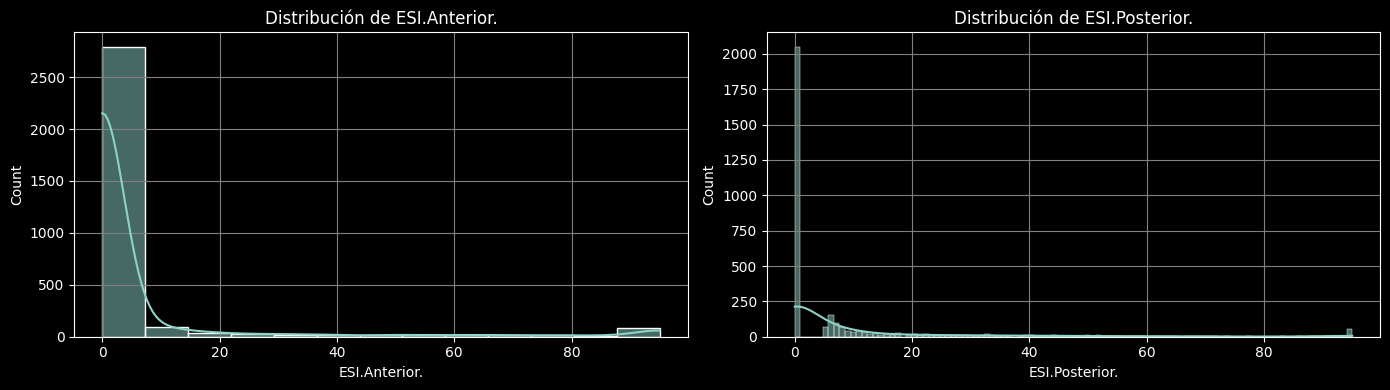

In [ ]:
ESI = ['ESI.Anterior.', 'ESI.Posterior.']

# distribución de Ectasia Screening Index (anterior y posterior)
plt.figure(figsize=(14, 4))
for i, col in enumerate(ESI[:2], 1):
    plt.subplot(1, 2, i)
    plt.grid(color='#808080')
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

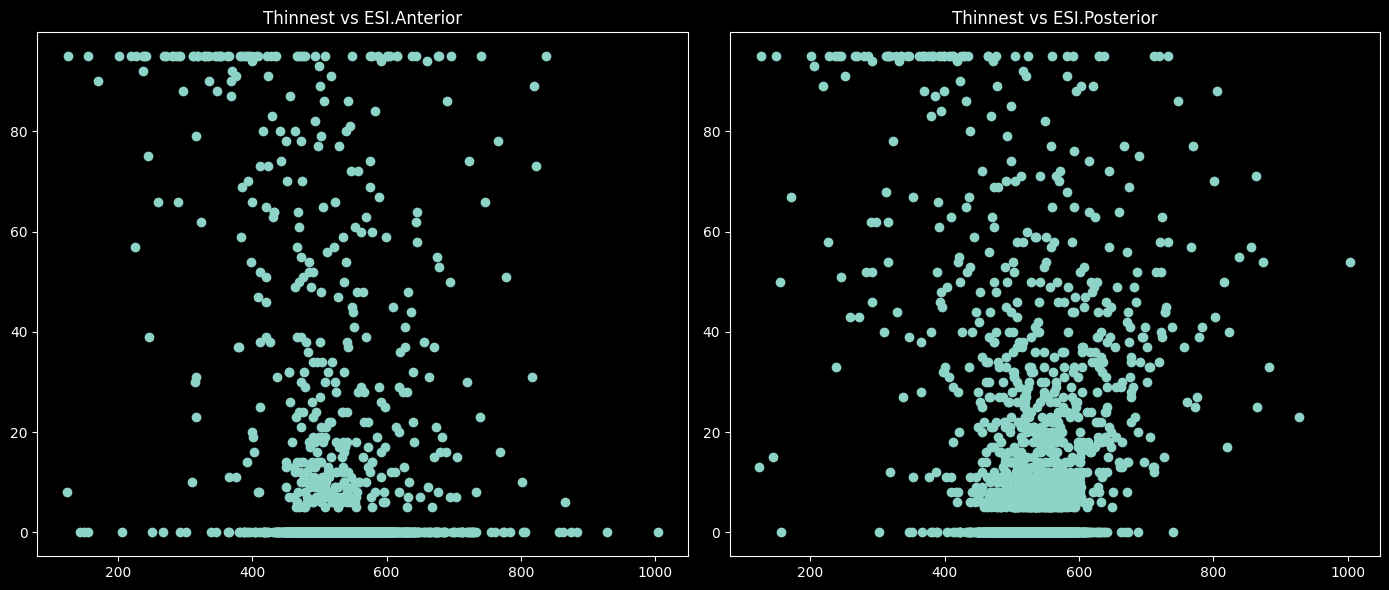

In [ ]:
# scatter de Thinnest vs ESI (anterior y posterior)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(data['Thinnest'], data['ESI.Anterior.'])
ax1.set_title('Thinnest vs ESI.Anterior')
ax2.scatter(data['Thinnest'], data['ESI.Posterior.'])
ax2.set_title('Thinnest vs ESI.Posterior')
plt.tight_layout()
plt.show()

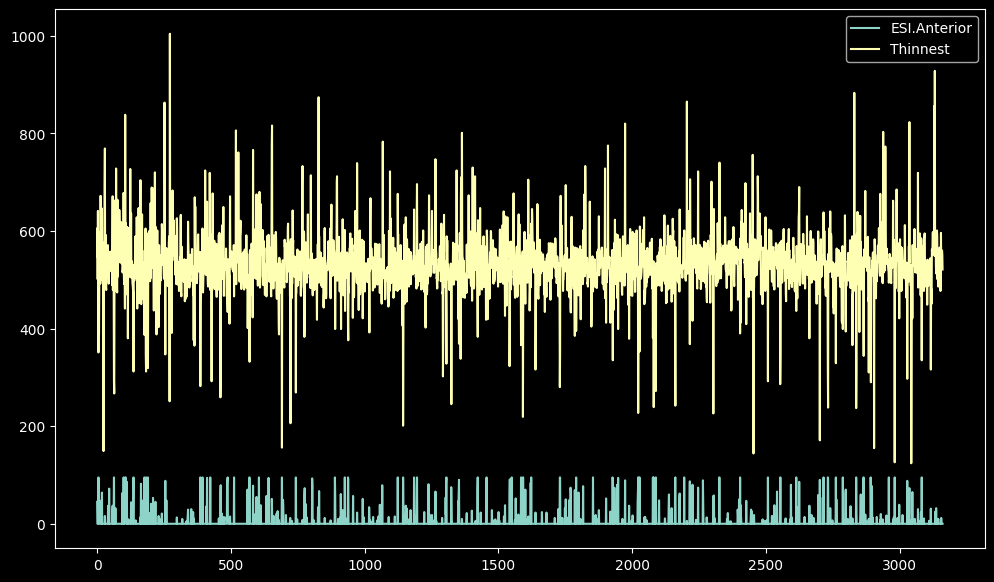

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(data['ESI.Anterior.'], label='ESI.Anterior')
plt.plot(data['Thinnest'], label='Thinnest')
plt.legend()
plt.show()

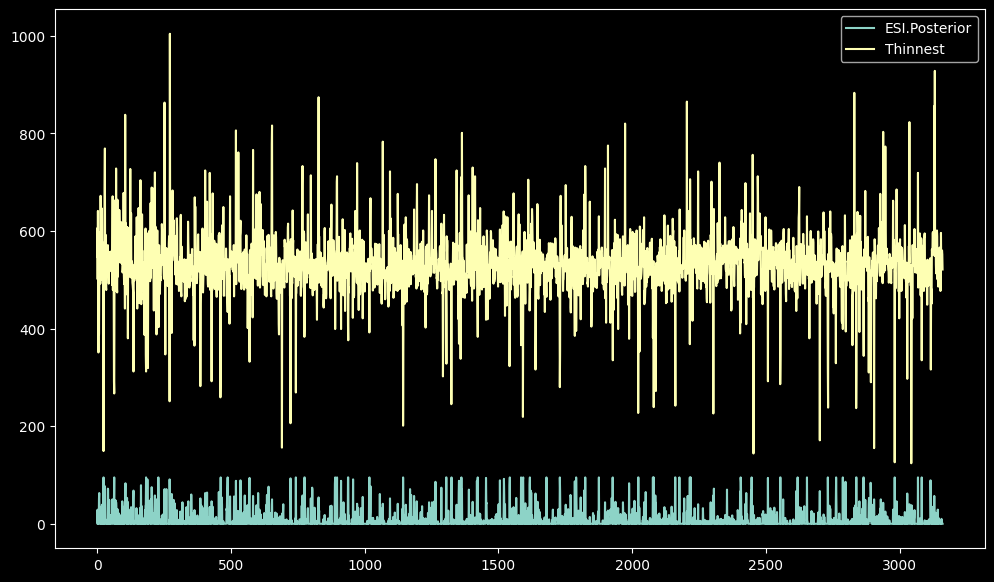

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(data['ESI.Posterior.'], label='ESI.Posterior')
plt.plot(data['Thinnest'], label='Thinnest')
plt.legend()
plt.show()

### **Preprocesamiento**

In [3]:
# datos y etiquetas
data = pd.read_csv(r"Datos/dataset.csv")
labels = pd.read_csv(r"Datos/labels.csv")

In [ ]:
data_limpio = data.copy(deep=True)
data_limpio.drop('En.Anterior.', inplace=True, axis=1) # solo valores numéricos

var_thr = VarianceThreshold(threshold = 0.01)   # se quitan constantes y cuasiconstantes
                                                # cambiando el threshold obtenemos mas o menos columnas y por lo tanto cambia el tamaño
                                                
var_thr.fit(data_limpio.iloc[:,2: ])
#var_thr.get_support()

VarianceThreshold(threshold=0.01)

In [ ]:
# selección de columnas para eliminar a partir del var_thr
concol = [column for column in data_limpio.iloc[:,2: ].columns 
          if column not in data_limpio.iloc[:,2: ].columns[var_thr.get_support()]]

# eliminacion
data_limpio.drop(concol, inplace=True, axis=1)

In [ ]:
# copiamos el dataset "limpio" para codificar las clases
le = LabelEncoder()
data_le = data_limpio.copy(deep = True)

In [7]:
type(data_le)

label = le.fit_transform(data_le['idEye'].values)
label

array([1638, 1637, 1822, ..., 1593, 1596, 1595])

Importante revisar que si tengamos nuestras variables de importancia, tales como 'Ks', 'Kf', 'CYL', 'Thinnest', etc.

Realmente no nos deshicimos de muchos datos, pero aún así, se probó variando el 'threshold' de la varianza para ver como reaccionaban los modelos con menos datos. (Y pues no hay ganancia significativa de rendimiento, tanto de tiempo de computación como de resultados de predicción)

In [8]:
data_le.drop('idEye', axis=1, inplace=True)
data_le['idEye'] = label
data_le.head(10)

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,3.131,97,-0.722,3.350,1.053,3.512,99,45,27,1638
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,0.575,97,0.085,0.921,0.290,0.966,100,0,0,1637
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,0.177,9,0.268,0.263,0.640,0.692,100,0,0,1822
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,0.492,275,-0.281,3.396,1.419,3.680,100,0,29,2204
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,0.571,85,0.109,0.691,0.181,0.714,100,0,7,2203
5,68,62.98,68,42.51,158,52.74,20.47,95.5,0.25,49.96,...,3.791,45,-1.581,13.387,9.154,16.218,98,95,0,2399
6,69,44.23,85,42.86,175,43.54,1.37,96.7,0.43,43.55,...,0.269,88,0.105,0.398,0.376,0.548,100,0,0,2398
7,87,44.61,170,43.75,80,44.18,0.86,97.9,0.46,44.14,...,0.085,20,0.375,0.437,0.360,0.566,100,0,52,2592
8,88,44.13,174,43.03,84,43.58,1.10,97.2,0.46,43.52,...,0.146,229,0.353,0.371,0.485,0.611,100,0,63,2593
9,138,45.83,165,45.37,75,45.60,0.46,96.8,0.80,45.60,...,0.219,74,0.269,0.330,0.315,0.457,100,0,24,2968


In [33]:
X = data_le.iloc[:,2:].values
y = labels.iloc[:,-1].values

In [34]:
for i in range(X.shape[1]):
    X[:,i] = le.fit_transform(X[:,i])
y = le.fit_transform(y)

In [ ]:
# el scaler se realiza como parte de la "normalización", pero al ser un RandomForest no es necesario
# solo se utiliza para el PCA

standard_scaler = StandardScaler()
#X = standard_scaler.fit_transform(X)

In [ ]:
classes , conteos = np.unique(y, return_counts=True)    # clases unicas
nClasses = len(classes)     # numero de clases

# print
print('Salida : ', nClasses)
print('Clases : ', classes)

Salida :  4
Clases :  [0 1 2 3]


Conteo por clase:
Clase 0: 264
Clase 1: 2595
Clase 2: 221
Clase 3: 82


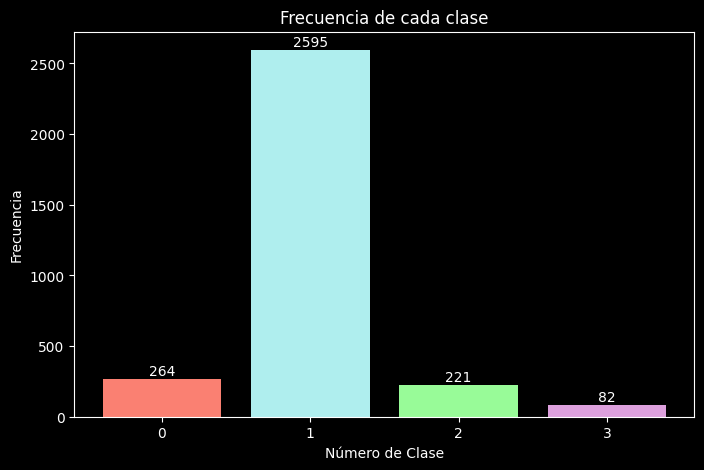

In [ ]:
# conteo de cada clase
print("Conteo por clase:")
for classe, conteo in zip(classes, conteos):
    print(f"Clase {classe}: {conteo}")

# plot
plt.figure(figsize=(8, 5))

color = ['salmon', 'paleturquoise', 'palegreen', 'plum']    # solo son colores para el plot
plt.bar(classes.astype(str), conteos, color=color)  # grafica de barras

for i, conteo in enumerate(conteos):
    plt.text(i, conteo + 5, str(conteo), ha='center', va='bottom')  # numero en cada barra

plt.title('Frecuencia de cada clase')
plt.xlabel('Número de Clase')
plt.ylabel('Frecuencia')
plt.xticks(classes.astype(str))

plt.show()

Finalmente, después de nuestro pequeño preprocesamiento realizamos nuestro split del dataset para el entrenamiento y las predicciones.

In [229]:
#podemos cambiar el tamaño del set de entrenamiento y test, utilizaremos un 85 / 15
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state = None)

# Verificar el tamaño de cada conjunto
print(f"Número total: {len(X)}")
print(f"Train - X: {len(X_train)}, y: {len(y_train)}")
print(f"Test - X: {len(X_test)}, y: {len(y_test)}")

Número total: 3162
Train - X: 2529, y: 2529
Test - X: 633, y: 633


### **Entrenamiento**

Entrenamos un modelo sencillo, con nuestro dataset ya algo limpio.

In [230]:
trainedforest = RandomForestClassifier(n_estimators=150,
                                       random_state = None,
                                       n_jobs = -1).fit(X_train,y_train)

Accuracy: 0.9684044233807267
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.97      0.99      0.98       537
           2       0.97      0.74      0.84        42
           3       0.94      1.00      0.97        15

    accuracy                           0.97       633
   macro avg       0.95      0.91      0.92       633
weighted avg       0.97      0.97      0.97       633



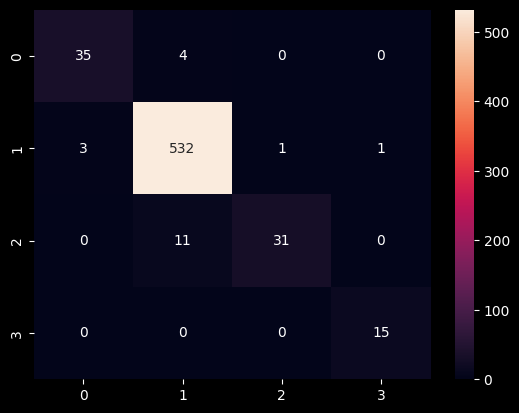

In [231]:
predictionforest = trainedforest.predict(X_test)    #para la inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest))
sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')    #Una matriz de confusión, para ver el desempeño
print(classification_report(y_test, predictionforest))  #reporte del modelo

##### - **Hiperparámetros del RandomForest**
Utilizando los paramétros de nuestra optimización, podemos intentar mejorar el modelo

##### - **GridSearch**

In [261]:
trainedforestGS = RandomForestClassifier(n_estimators=400,
                                        min_samples_split= 2,
                                        min_samples_leaf= 1,
                                        max_features = 'sqrt',
                                        max_depth= None,
                                        bootstrap= False,
                                        random_state = None,
                                        n_jobs=-1).fit(X_train,y_train)

Accuracy: 0.957345971563981
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        53
           1       0.96      0.99      0.97       520
           2       0.91      0.69      0.78        45
           3       1.00      0.93      0.97        15

    accuracy                           0.96       633
   macro avg       0.96      0.87      0.91       633
weighted avg       0.96      0.96      0.96       633



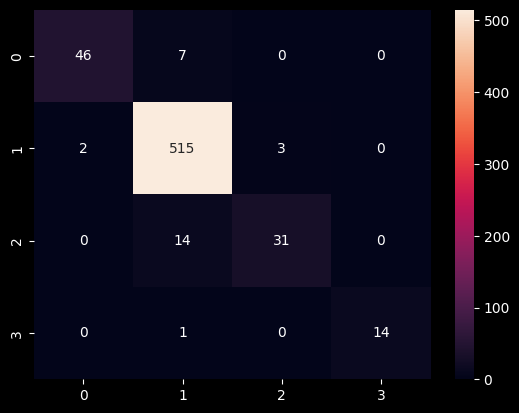

In [262]:
predictionforest1 = trainedforestGS.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictionforest1))
sns.heatmap(confusion_matrix(y_test, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest1))

##### - **RandomizedSearch**

In [234]:
trainedforestRS = RandomForestClassifier(n_estimators= 693,
                                    max_depth= 105,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 4,
                                    min_samples_split=7,
                                    bootstrap= False,
                                    random_state=None,
                                    n_jobs=-1,
                                    ).fit(X_train, y_train)

Accuracy: 0.9715639810426541
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.97      0.99      0.98       537
           2       0.97      0.76      0.85        42
           3       0.94      1.00      0.97        15

    accuracy                           0.97       633
   macro avg       0.96      0.91      0.93       633
weighted avg       0.97      0.97      0.97       633



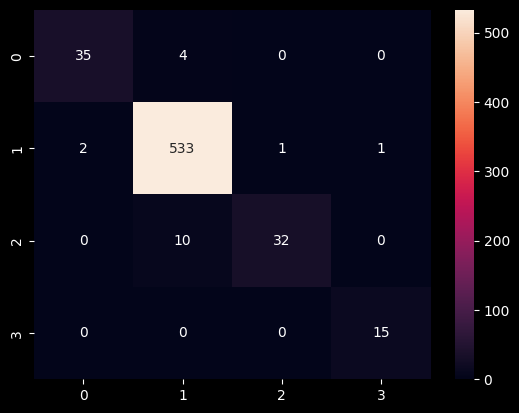

In [235]:
predictionforest2 = trainedforestRS.predict(X_test) # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest2))
sns.heatmap(confusion_matrix(y_test, predictionforest2), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest2))  # reporte del modelo

### **Aplicación de PCA**

Como se había comentado, la estandarización no es necesaria para un RandomForest, pero si queremos aplicar un PCA si lo necesitamos, aquí solo rehacemos el dataframe y le aplicamos la función.

In [236]:
X = standard_scaler.fit_transform(X)    # estandarización
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=None)  # 80 / 20

In [237]:
pca = PCA(n_components=4)   # aplicación sencillisima de PCA
 
X_train_pca = pca.fit_transform(X_train) # fit para el entrenamiento
X_test_pca = pca.transform(X_test)

# varianza del PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print('Varianza total por componente: {}'.format(explained_variance))
print('Varianza total: {}'.format(total_explained_variance))

Varianza total por componente: [0.28740688 0.14086551 0.0538456  0.04022184]
Varianza total: 0.5223398305793815


##### **Entrenamiento PCA**

Volvemos a aplicar los 3 modelos que tenemos, el "normal" y los dos ajustados.

Accuracy: 0.9383886255924171
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        53
           1       0.95      0.98      0.96       520
           2       0.86      0.69      0.77        45
           3       1.00      0.87      0.93        15

    accuracy                           0.94       633
   macro avg       0.92      0.82      0.87       633
weighted avg       0.94      0.94      0.94       633



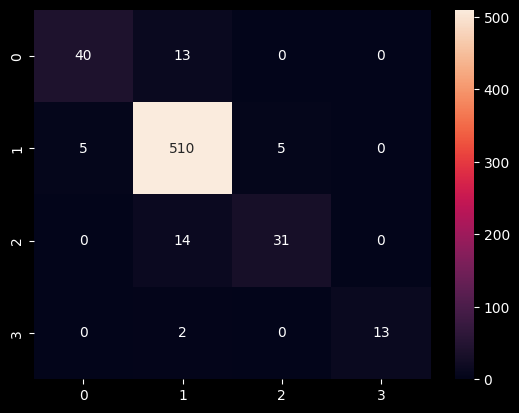

In [238]:
trainedforest_pca = trainedforest.fit(X_train_pca,y_train)  # RandomForest número 1 con PCA

predictionforest_pca = trainedforest_pca.predict(X_test_pca)    # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest_pca))
sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca))  # reporte del modelo 1

Accuracy: 0.9352290679304898
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        53
           1       0.94      0.98      0.96       520
           2       0.81      0.67      0.73        45
           3       1.00      0.87      0.93        15

    accuracy                           0.94       633
   macro avg       0.92      0.82      0.86       633
weighted avg       0.93      0.94      0.93       633



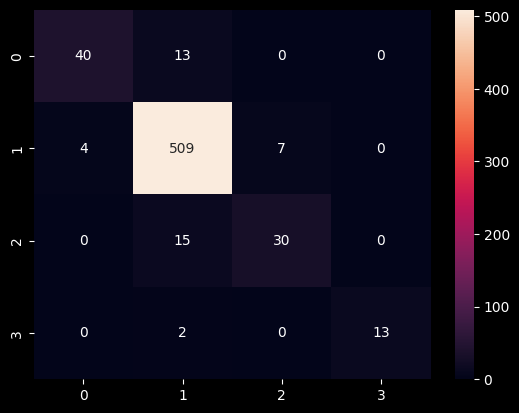

In [266]:
trainedforest_pca1 = trainedforestGS.fit(X_train_pca,y_train)    # RandomForest número 2 con PCA. GridSearch

predictionforest_pca1= trainedforest_pca1.predict(X_test_pca)    # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest_pca1))
sns.heatmap(confusion_matrix(y_test, predictionforest_pca1), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca1))  # reporte del modelo

Accuracy: 0.9368088467614534
              precision    recall  f1-score   support

           0       0.91      0.74      0.81        53
           1       0.94      0.98      0.96       520
           2       0.86      0.67      0.75        45
           3       1.00      0.87      0.93        15

    accuracy                           0.94       633
   macro avg       0.93      0.81      0.86       633
weighted avg       0.94      0.94      0.93       633



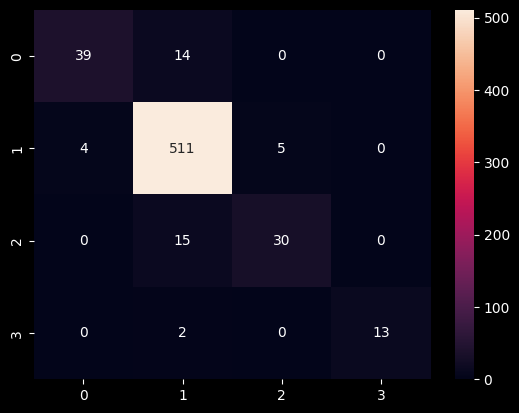

In [263]:
trainedforest_pca2 = trainedforestRS.fit(X_train_pca,y_train)    # RandomForest número 3 con PCA. RandomizedSearch

predictionforest_pca2 = trainedforest_pca2.predict(X_test_pca)    # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest_pca2))
sns.heatmap(confusion_matrix(y_test, predictionforest_pca2), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca2))  